Confidence Intervals
====

## Unit 8, Lecture 2

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, March 22 2018

Computing Confidence Interval for error in population mean with $t$-Distribution 
====

We know that the error in the population mean follows a $t$-distribution for small $N$. What if we want a confidence interval for where the true mean lies?

$$P(a < \mu < b) = 0.95$$

One simplification we can make right away is that we know $\mu$ will be centered at $\bar{x}$ and is symmetric:

$$P( \bar{x} - y < \mu<  \bar{x} + y) = 0.95$$

where $y$ is some number we need to find. We can further rewrite this as:

$$P( - y < \mu - \bar{x}<  + y) = 0.95$$

which we know follows a $t-$distribution. Note that these are probailities, which are integrals of the probability distribution

Here's a visual to understand what we're after. Note that I'm actually answering this problem to make the graph, so wait until later to try to understand the code!

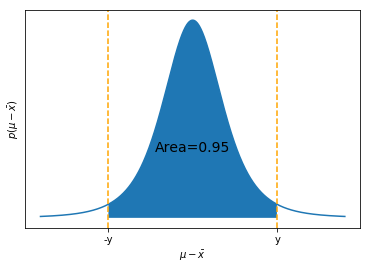

In [3]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

#make some points for plot
N = 5
x = np.linspace(-5,5, 1000)
T = ss.t.ppf(0.975, df=N-1)
y = ss.t.pdf(x, df=N-1)
plt.plot(x,y)  
plt.fill_between(x, y, where= np.abs(x) < T)
plt.text(0,np.max(y) / 3, 'Area=0.95', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='orange')
plt.xticks([-T, T], ['-y', 'y'])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()


This is a very similar problem to the prediction intervals we had before. We know that $p(\mu - \bar{x})$ follows a $T(0, \sigma_x /\sqrt{N})$ distribution and we can use the same idea as $Z$-scores as we did for prediction intervals



$$T(s) = \frac{s - 0}{\sigma_x / \sqrt{N}}$$

The 'mean' our error in the population mean distribution is 0, because our error in population mean is always centered around 0.

After taking 5 samples, we've found that the sample mean is 45 and the sample standard deviation, $\sigma_x$ is 3. What is the 95% confidence interval for the true mean, $\mu$?

We can write this more like this:

$$P(- y < \mu - \bar{x} < +y) = 0.95$$

Our interval will go from 2.5% to 97.5% (95% of probability), so let's find the $T$-value for $-\infty$ to 2.5% and 97.5% to $\infty$. Remember that the $T$-value depends on the degrees of freedom, N-1.

In [1]:
import scipy.stats

#The lower T Value. YOU MUST GIVE THE SAMPLE NUMBER
print(scipy.stats.t.ppf(0.025, 4))
print(scipy.stats.t.ppf(0.975, 4))

-2.7764451052
2.7764451052


$$T_{low} = \frac{-y - 0}{\sigma_x / \sqrt{N}}$$
$$T_{low} = -\frac{y}{\sigma_x / \sqrt{N}}$$

$$y = -T_{low}\frac{\sigma_x}{\sqrt{N}}$$

In [4]:
print(-scipy.stats.t.ppf(0.025, 4) * 3 / np.sqrt(5))

3.72499199461


The final answer is $P(45 - 3.72 < 45 < 45 + 3.72) = 0.95$ or $45\pm 3.72$

Computing Confidence Interval for Error in Population Mean Steps
====

1. Is the sample size greater than 25 OR do you know the true (population) standard deviation? If so, then use standard normal ($Z$) otherwise the $t$-distribution for your sample size ($T$).
2. Build your interval in probability. For example, a 95% double-sided goes from 2.5% to 97.5%
3. Find the $Z$ or $T$ values that match your interval. For example, $Z_{low} = -1.96$ to $Z_{high} = 1.96$ is for a double-sided 95% confidence inerval. Use the `scipy.stats.t.ppf` or `scipy.stats.norm.ppf` function to find them.
4. Use the $Z(s) = s \sqrt{N} / \sigma_x$ or $T(s) = s \sqrt{N} / \sigma_x$ equation to find the interval values in your particular distribution.
5. Report your answer either as an interval or the $\pm$ notation.

Shortcut Method For Normal
====

Here's how to quickly do these steps in Python for sample size greater than 25

In [8]:
data = scipy.stats.norm.rvs(size=100, scale=15, loc=50)
#Check if sample size is big enough.
#This code will cause an error if it's not
assert len(data) > 25 

CI = 0.95
sample_mean = np.mean(data)
#The second argument specifies what the denominator should be (N - x),
#where x is 1 in this case
sample_var = np.var(data, ddof=1) 
Z = scipy.stats.norm.ppf((1 - CI) / 2)
y = -Z * np.sqrt(sample_var / len(data))

print('{} +/ {}'.format(sample_mean, y))
                             

52.737394376038466 +/ 2.707370654342695


Is that low? Well, remember that our error in the mean follows standard deviation divided by the root of number of samples.

Shortcut Method For $t$-Distribution
====

Here's how to quickly do these steps in Python for sample size less than 25

In [7]:
data = scipy.stats.norm.rvs(size=4, scale=15, loc=50)
CI = 0.95
sample_mean = np.mean(data)
sample_var = np.var(data, ddof=1) 
T = scipy.stats.t.ppf((1 - CI) / 2, df=len(data)-1)
y = -T * np.sqrt(sample_var / len(data))

print('{} +/ {}'.format(sample_mean, y))
                             

46.428887321771896 +/ 5.8933927994534105


Example of Prediction Intervals
====

I *know* that the thickness of a metal slab is distributed according to ${\cal N}(3.4, 0.75)$. Construct a prediction interval so that a randomly chosen metal slab will lie within it 95% confidence.

$$P( \mu - y < x < \mu + y) = 0.95$$

This is a prediction interval, so we're computing a interval on the distribution itself and we know everything about it.

$$Z(\mu + y) = \frac{\mu + y - \mu}{\sigma} \Rightarrow y = \sigma Z$$

$$Z = 1.96$$

$$x = \mu \pm 1.96 \sigma = 3.4 \pm 1.40$$

A randomly chosen slab will have a thickness of $3.4 \pm 1.40$ 95% of the time. 

Example 1 of error in population mean with known $\sigma$
====

I measure the thickness of 35 metal slabs and find that $\bar{x}$, the sample mean, is 3.38. If I know that $\sigma = 0.75$, construct a confidence interval that will contain the true mean $\mu$ with 95% confidence.

We know that $p(\bar{x} - \mu)$ is normally distributed with ${\cal N}(0, \sigma / \sqrt{N})$. We want to find

$$ P(-y < \bar{x} - \mu < +y) = 0.95$$

$$ Z(+y) = \frac{y - 0}{\sigma_e} = \frac{y}{\sigma / \sqrt{N}} \Rightarrow y = \frac{\sigma}{\sqrt{N}} Z$$

$$y = \frac{0.75}{\sqrt{35}}1.96 = 0.248$$

$$ \mu - \bar{x} = 0 \pm 0.248$$

$$ \mu = 3.38 \pm 0.248$$

At a 95% confidence level, the true mean is $3.38 \pm 0.248$. 

Example 2 of error in population mean with known $\sigma$
====

I measure the thickness of 11 metal slabs and find that $\bar{x}$, the sample mean, is 5.64. If I know that $\sigma = 1.2$, construct a confidence interval that will contain the true mean $\mu$ with 99% confidence.

Again we know that $p(\bar{x} - \mu)$ is normally distributed with ${\cal N}(0, \sigma / \sqrt{N})$. We want to find

$$ P(-y < \bar{x} - \mu < +y) = 0.99$$

$$ Z(+y) = \frac{y - 0}{\sigma_e} = \frac{y}{\sigma / \sqrt{N}} \Rightarrow y = \frac{\sigma}{\sqrt{N}} Z$$

$$y = \frac{1.2}{\sqrt{11}}2.575 = 0.932$$

$$ \mu - \bar{x} = 0 \pm 0.932$$

$$ \mu = 5.64 \pm 0.932$$

Example 1 of error in population mean with unknown $\sigma$
====

I measure the thickness of 6 metal slabs and find that $\bar{x}$, the sample mean, is 3.65 and the sample standard deviation is $1.25$. Construct a confidence interval that will contain the true mean $\mu$ with 90% confidence.


$$T(+y) = \frac{y - 0}{\sigma_x / \sqrt{N}} \Rightarrow y = \frac{\sigma_x}{\sqrt{N}} T$$

We know that $p(\bar{x} - \mu)$ is a $t$-distribution because $N$ is small. It is distributed as $T(0, \sigma_x / \sqrt{N})$. We want to find

$$ P(-y < \bar{x} - \mu < +y) = 0.90$$

In [8]:
#Notice it is 95%, so the interval goes from
#5% to 95% containing 90% of probability
T = scipy.stats.t.ppf(0.95, df=6-1)
print(T)

2.01504837267


$$ y = \frac{1.25}{\sqrt{6}} 2.015 = 1.028 $$
$$\mu = 3.65 \pm 1.028$$

The population mean of the slabs is $3.65 \pm 1.028$ with 90% confidence.

Example 2 of error in population mean with unknown $\sigma$
====

I measure the thickness of 25 metal slabs and find that $\bar{x}$, the sample mean, is 3.42 and the sample standard deviation is 0.85. Construct a confidence interval that will contain the true mean $\mu$ with 90% confidence.

We know, just like last example, that $P(\bar{x} - \mu)$ is a normal distribution because $N$ is large enough for the central limit theorem to apply. It is distributed as ${\cal N}(0, \sigma_x / \sqrt{N})$. We want to find

$$ P(-y < \bar{x} - \mu < +y) = 0.90$$

$$Z(+y) = \frac{y - 0}{\sigma_x / \sqrt{N}} \Rightarrow y = \frac{\sigma_x}{\sqrt{N}} Z$$

$$ y = \frac{0.85}{\sqrt{25}} 1.645 = 0.28$$

$$\mu = 3.42 \pm 0.28$$